<h2> Хищник- Жертва </h2>

In [1]:
{minT, maxT, stepT} = {0, 7, 0.1};

(* Возвращаем график, в котором использовали переменные b,c,d*)
interPredator[b_, c_, d_] := Module[
    {a = 3},
    
    eq1[t_] := x'[t] == x[t] * (a - b * y[t]);
    eq2[w_] := y'[w] == y[w] * (-c + d * x[w]);
    sols = NDSolve[
        {eq1[t], eq2[t], x[0] == 2, y[0] == 2},
        {x, y},
        {t, minT, maxT},
        MaxSteps->3000
    ];
    dataset = Table[
        {x[t], y[t]} /. sols[[1]],
        {t, minT, maxT, stepT}
    ];
    ListPlot[dataset, Joined->True, PlotRange->All, ImageSize->500]
]

Manipulate[{interPredator[b, c, d]}, {b, 1, 10, 1}, {c, 1, 10, 1}, {d, 1, 10, 1}]
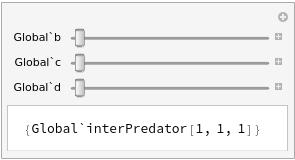

In [4]:
{minVal, maxVal, stepVal} = {1, 10, 1};

Manipulate[
    {interPredator[b, c, d]},
    {b, minVal, maxVal, stepVal},
    {c, minVal, maxVal, stepVal},
    {d, minVal, maxVal, stepVal}
]

<h2> Падение тела, брошенного под углом к горизонту </h2>

In [6]:
{minT, maxT, stepT} = {0, 7, 0.1};
{phisG, phisAlpha, phisV0} = {9.81, Pi/4, 10};

(* Как переменную используем только сопротивление воздуха *)
interThrow[k_] := Module[
    {},
    
    eq1[t_] := y1'[t] == y2[t];
    eq2[t_] := y2'[t] == -k * y2[t] * Sqrt[y2[t]^2 + y4[t]^2];
    eq3[t_] := y3'[t] == y4[t];
    eq4[t_] := y4'[t] == -k * y4[t] * Sqrt[y2[t]^2 + y4[t]^2] - phisG;
    sols = NDSolve[
        {eq1[t], eq2[t], eq3[t], eq4[t], 
            y1[0] == 0, y2[0] == phisV0*Cos[phisAlpha], y3[0] == 0, y4[0] == phisV0*Sin[phisAlpha]},
        {y1, y2, y3, y4},
        {t, minT, maxT},
        MaxSteps->3000
    ];
    dataset = Table[
        {y1[t], y3[t]} /. sols[[1]],
        {t, minT, maxT, stepT}
    ];
    ListPlot[dataset, Joined->True, PlotRange->{0, 2}, ImageSize->500]
]

Manipulate[{interThrow[k]}, {k, 0.1, 0.9, 0.1}]
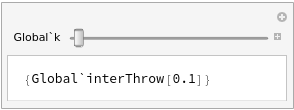

In [10]:
{minK, maxK, stepK} = {0.1, 0.9, 0.1};

Manipulate[
    {interThrow[k]},
    {k, minK, maxK, stepK}
]